In [8]:
import numpy as np
import matplotlib.pyplot as plt

Data Model: data = signal+noise    
signal           = Ax+mu  
x is a random number drawn from a standard normal distribution, < x >=0, <x^2>=1    
the noise is Gaussian with mean =< noise >=0 and variance = < ( x-< x >)**2 >=sigma^2

A and mu depend on the parameters a,b. a and b are the parameters we are interested in inferring.

In [9]:
#get A as a function of a,b
def get_A(a,b,dim=1):
    A = a**2*np.ones((dim,dim))+b/2.
    return A

In [10]:
#get mu as a function of a,b
def get_mu(a,b, dim=1):
    mu = a**3/np.exp(b)*np.ones(dim)
    return mu

Fiducial Parameters (this is the underlying truth)

In [11]:
a_0=2; b_0=0.5

In [12]:
A_0  = get_A(a_0,b_0)
mu_0 = get_mu(a_0, b_0)

Noise level

In [13]:
sigma = 0.1

In [195]:
def generate_noise(sigma,dim=1):
    #fill in
    return noise

In [196]:
def generate_signal(A,mu,sigma,rand_seed,dim=1):
    
    #fill in
    
    return data

In [197]:
def generate_data(A,mu,sigma,rand_seed=None,dim=1):
    
    #fill in
    
    return data

fiducial data (that's the assumed truth)

In [198]:
fid_data = generate_data(A_0,mu_0,sigma,rand_seed=123)

take derivatives at fixed random seed

Questions:  
1) What's the mean and the vraiance of the data? Which distribution does the data follow? (Write down an equation P(d)=...)   
2) How can I estimate the variance of the data, given a big enough data sample? Can you write some code for this? (maybe start with the mean) Does your estimate confirm your calculation from 1)?   
3) Write a finite differencing operatator with respect to a and b for the data.

-log L(data|x) is what we want to take thed erivative of wrt to parameters

In [231]:
def chi2(fwd,data_fid,sigma):
    return np.sum(0.5*((fwd-data_fid)/sigma)**2,axis=0)

In [232]:
def first_derivative(delta_a,delta_b,a_0,b_0,sigma,random_seed):
    
    A_fwd_a = get_A(a_0+delta_a,b_0)
    A_bwd_a = get_A(a_0-delta_a,b_0)
    A_fwd_b = get_A(a_0,b_0+delta_b)
    A_bwd_b = get_A(a_0,b_0-delta_b)

    mu_fwd_a = get_mu(a_0+delta_a,b_0)
    mu_bwd_a = get_mu(a_0-delta_a,b_0)
    mu_fwd_b = get_mu(a_0,b_0+delta_b)
    mu_bwd_b = get_mu(a_0,b_0-delta_b)
    
    data_fwd_a  = forward_model(A_fwd_a,mu_fwd_a,sigma,rand_seed=random_seed)
    data_bwd_a  = forward_model(A_bwd_a,mu_bwd_a,sigma,rand_seed=random_seed)
    data_fwd_b  = forward_model(A_fwd_b,mu_fwd_b,sigma,rand_seed=random_seed)
    data_bwd_b  = forward_model(A_bwd_b,mu_bwd_b,sigma,rand_seed=random_seed)

    
    dLda = (chi2(data_fwd_a,data_fid,sigma)-chi2(data_bwd_a,data_fid,sigma))/(2.*delta_a)
    dLdb = (chi2(data_fwd_b,data_fid,sigma)-chi2(data_bwd_b,data_fid,sigma))/(2.*delta_b)
    
    return dLda, dLdb

In [238]:
means=[]
for ii in np.linspace(1,40,2):
    print(ii)
    derives=[]
    for ii in range(10000*(int(ii)+1)):
        np.random.seed(None)
        random_seed = np.random.randint(low=0,high=1e6)
        derives.append(first_derivative(delta_a,delta_b,a_0,b_0,sigma,random_seed))
    means.append(np.mean(np.asarray(derives)[:,0,0]))

1.0
40.0


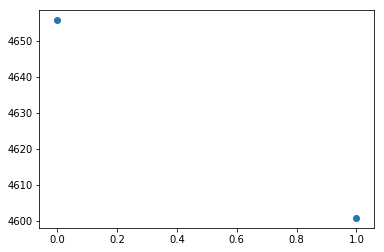

In [239]:
plt.scatter(np.arange(len(means)),means)

In [240]:
A_fwd_a = get_A(a_0+delta_a,b_0)
A_bwd_a = get_A(a_0-delta_a,b_0)
A_fwd_b = get_A(a_0,b_0+delta_b)
A_bwd_b = get_A(a_0,b_0-delta_b)

mu_fwd_a = get_mu(a_0+delta_a,b_0)
mu_bwd_a = get_mu(a_0-delta_a,b_0)
mu_fwd_b = get_mu(a_0,b_0+delta_b)
mu_bwd_b = get_mu(a_0,b_0-delta_b)

In [241]:
((mu_fwd_a**2-mu_bwd_a**2+2*data_fid*(mu_fwd_a-mu_bwd_a)+A_fwd_a**2-A_bwd_a**2)/sigma**2)/(delta_a*4)

array([[ 5934.10406359]])

In [242]:
print(means)

[4655.7223742473807, 4600.9050771774982]
